<a href="https://colab.research.google.com/github/Abhijit8229/L2Regularization-Ridge-/blob/main/MULTILINEARREGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

print("Path to dataset files:", path)

100%|██████████| 8.70k/8.70k [00:00<00:00, 6.68MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/spscientist/students-performance-in-exams/versions/1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(path+"/StudentsPerformance.csv")


In [ ]:
data.info()
data.shape
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
#checking for nulls
is_null = [col for col in data.columns if data[col].isnull().sum()>0]
print("no null values in the data") if len(is_null)==0 else print("columns with null values are :",is_null)

no null values in the data


In [ ]:
# creating a feature called total Marks
data["totalMarks"] = data["math score"] + data["reading score"] + data["writing score"]
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,totalMarks
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


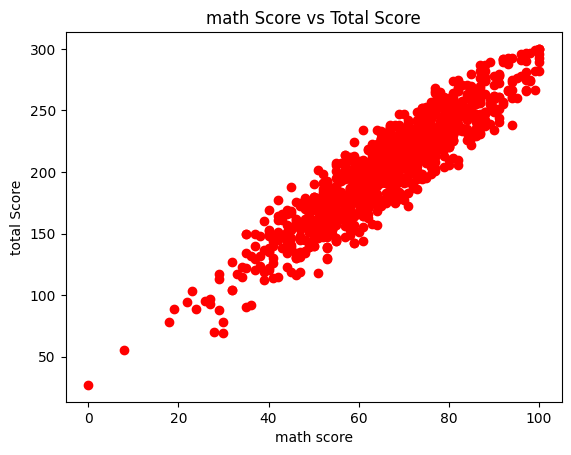

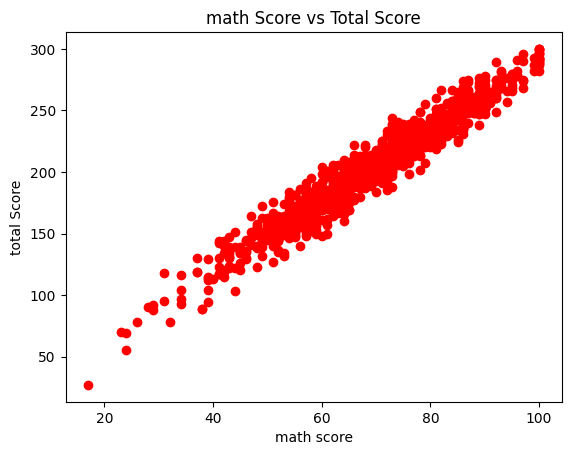

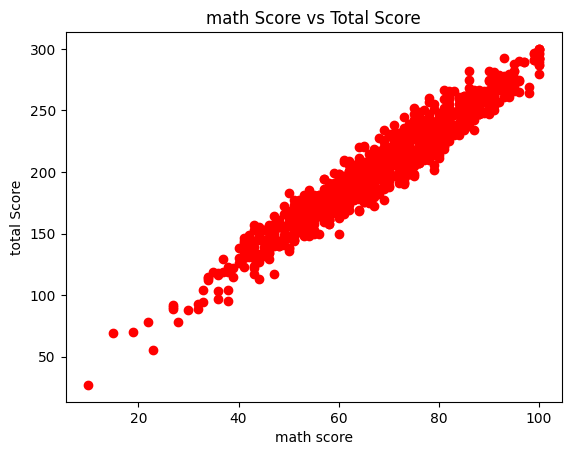

In [ ]:
def Scatter(x,y,x_label,y_label,title):
  plt.scatter(x,y,color="red")
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.show()
Scatter(data["math score"],data["totalMarks"],"math score","total Score","math Score vs Total Score")
Scatter(data["reading score"],data["totalMarks"],"math score","total Score","math Score vs Total Score")
Scatter(data["writing score"],data["totalMarks"],"math score","total Score","math Score vs Total Score")
#this shows that mathScore,reading Score, WritingScore and total score are all in linear

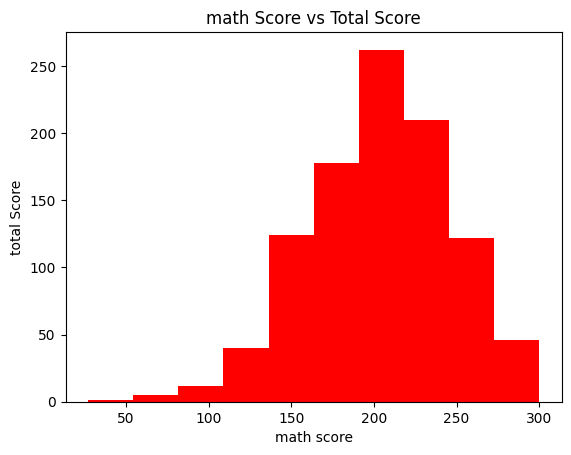

In [ ]:
plt.hist(data["totalMarks"],color="red")
plt.title("math Score vs Total Score")
plt.xlabel("math score")
plt.ylabel("total Score")
plt.show()

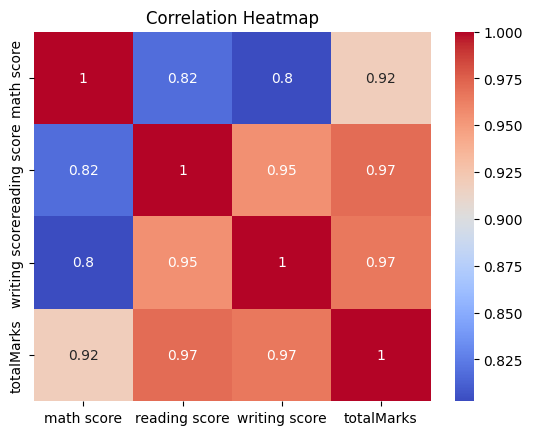

In [ ]:
data_num = data[["math score","reading score","writing score","totalMarks"]]
sns.heatmap(data_num.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


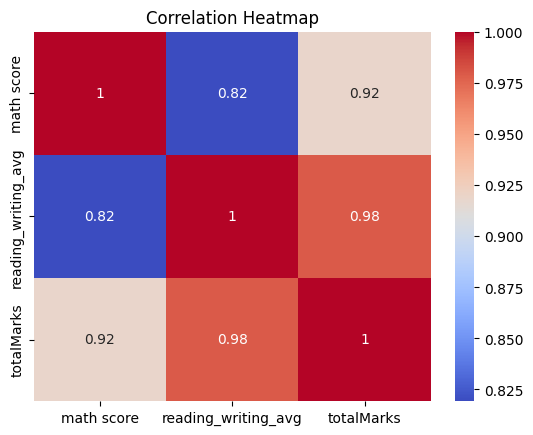

In [ ]:
#too multicolinear so i'll combine the reading and writing marks and check the collinartity again
data["reading_writing_avg"] = (data["reading score"] + data["writing score"]) / 2
data_num = data[["math score","reading_writing_avg","totalMarks"]]
sns.heatmap(data_num.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#standarding the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Split the dataset
data_num_X = data_num.drop("totalMarks", axis=1)
data_num_Y = data_num["totalMarks"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    data_num_X, data_num_Y, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add bias (intercept) term manually
X_train_bias = np.concatenate([np.ones((X_train_scaled.shape[0], 1)), X_train_scaled], axis=1)
X_test_bias = np.concatenate([np.ones((X_test_scaled.shape[0], 1)), X_test_scaled], axis=1)


In [ ]:
LEARNING_RATE = 0.01
EPOCHS = 1000
lamda = 0.1
# Add bias term
X = np.concatenate([np.ones((X_train_scaled.shape[0], 1)), X_train_scaled], axis=1)

m = X.shape[0]
theta = np.zeros((X.shape[1], 1))

for epoch in range(EPOCHS):
    pre_y = np.dot(X, theta)
    error = pre_y - y_train
    gradient = (1 / m) * np.dot(X.T, error)

    regularization = (lamda / m) * theta
    regularization[0] = 0  # No regularization on bias
    theta = theta - LEARNING_RATE * (gradient + regularization)

print("Final theta values:")
print(theta.ravel())




Final theta values:
[204.49867116  16.15824773  28.05445249]


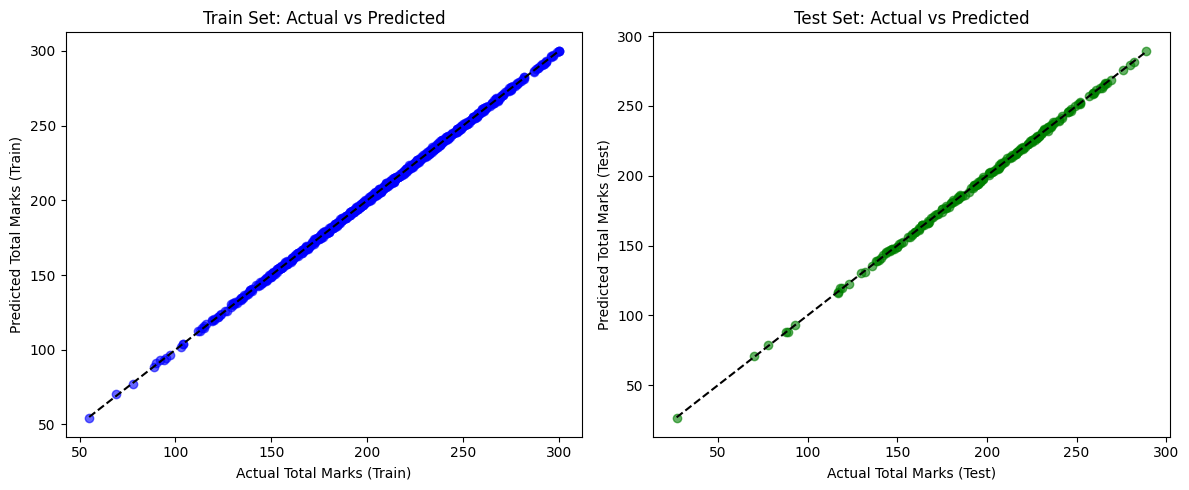

In [ ]:


# 1. Predictions for training data
X_train_bias = np.concatenate([np.ones((X_train.shape[0], 1)), scaler.transform(X_train)], axis=1)
y_train_pred = np.dot(X_train_bias, theta)

# 2. Predictions for test data
X_test_bias = np.concatenate([np.ones((X_test.shape[0], 1)), scaler.transform(X_test)], axis=1)
y_test_pred = np.dot(X_test_bias, theta)

# 3. Plot
plt.figure(figsize=(12, 5))

# Training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color="blue", alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color="black", linestyle="--")
plt.xlabel("Actual Total Marks (Train)")
plt.ylabel("Predicted Total Marks (Train)")
plt.title("Train Set: Actual vs Predicted")

# Test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color="green", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="black", linestyle="--")
plt.xlabel("Actual Total Marks (Test)")
plt.ylabel("Predicted Total Marks (Test)")
plt.title("Test Set: Actual vs Predicted")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import r2_score
X_test_scaled = scaler.transform(X_test)
X_test_bias = np.concatenate([np.ones((X_test_scaled.shape[0], 1)), X_test_scaled], axis=1)
y_pred = np.dot(X_test_bias, theta)
r2 = r2_score(y_test, y_pred)
print("R² Score on Test Set:", round(r2, 4))

R² Score on Test Set: 0.9997


In [ ]:
math,read_writing = map(int,input().split())
n = np.array([math,read_writing])
n_scaled = scaler.transform(n.reshape(1, -1))
n_bias = np.concatenate([np.ones((1, 1)), n_scaled], axis=1)
pred = np.dot(n_bias, theta)
print("Predicted Total Marks:", round(pred[0][0], 2))


72 148
Predicted Total Marks: 362.21


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
